In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
import sklearn
from sklearn import metrics, neural_network
import itertools
import Utility
import time
import scipy
from sklearn import preprocessing, naive_bayes
import math 
plt.rcParams['figure.dpi'] = 150
import scipy.stats as stats


sklearn.__version__
##Jose Vera (jvera3@hawk.iit.edu)
##Assignment 4

'1.1.2'

In [83]:
df = pd.read_csv('Purchase_Likelihood.csv').dropna()
dfx = df.drop(columns='insurance')

catName = ['group_size','homeowner','married_couple']

In [84]:
def RowWithColumn (
   rowVar,          # Row variable
   columnVar,       # Column predictor
   show = 'ROW'):   # Show ROW fraction, COLUMN fraction, or BOTH table

   countTable = pd.crosstab(index = rowVar, columns = columnVar, margins = False, dropna = True)
   print("Frequency Table: \n", countTable)
   print( )

   if (show == 'ROW' or show == 'BOTH'):
       rowFraction = countTable.div(countTable.sum(1), axis='index')
       print("Row Fraction Table: \n", rowFraction)
       print( )

   if (show == 'COLUMN' or show == 'BOTH'):
       columnFraction = countTable.div(countTable.sum(0), axis='columns')
       print("Column Fraction Table: \n", columnFraction)
       print( )

   return

In [85]:
catGroupSize = df['group_size'].unique()
catHomeowner = df['homeowner'].unique()
catMarriedCouple = df['married_couple'].unique()
catInsurance = df['insurance'].unique()

RowWithColumn(rowVar = df['insurance'], columnVar = df['group_size'], show = 'ROW')
print('-----------')
RowWithColumn(rowVar = df['insurance'], columnVar = df['homeowner'], show = 'ROW')
print('-----------')
RowWithColumn(rowVar = df['insurance'], columnVar = df['married_couple'], show = 'ROW')


Frequency Table: 
 group_size       1      2     3    4
insurance                           
0           115460  25728  2282  221
1           329552  91065  5069  381
2            74293  19600  1505   93

Row Fraction Table: 
 group_size         1         2         3         4
insurance                                         
0           0.803530  0.179051  0.015881  0.001538
1           0.773475  0.213734  0.011897  0.000894
2           0.778010  0.205255  0.015761  0.000974

-----------
Frequency Table: 
 homeowner       0       1
insurance                
0           78659   65032
1          183130  242937
2           46734   48757

Row Fraction Table: 
 homeowner         0         1
insurance                    
0          0.547418  0.452582
1          0.429815  0.570185
2          0.489407  0.510593

-----------
Frequency Table: 
 married_couple       0      1
insurance                    
0               117110  26581
1               333272  92795
2                75310  20181



In [86]:
df = df.astype('category')
xTrain = pd.get_dummies(df[['group_size','homeowner','married_couple']])
yTrain = df.insurance

In [87]:
# Correctly Use sklearn.naive_bayes.CategoricalNB
feature = catName

labelEnc = preprocessing.LabelEncoder()
yTrain = labelEnc.fit_transform(df['insurance'])
yLabel = labelEnc.inverse_transform([0, 1])

uGropuSize = np.unique(df['group_size'])
uHomeowner = np.unique(df['homeowner'])
uMarriedCouple = np.unique(df['married_couple'])

featureCategory = [uGropuSize, uHomeowner, uMarriedCouple]
print(featureCategory)

featureEnc = preprocessing.OrdinalEncoder(categories = featureCategory)
xTrain = featureEnc.fit_transform(df[['group_size', 'homeowner', 'married_couple']])

_objNB = naive_bayes.CategoricalNB(alpha = 0)
thisModel = _objNB.fit(xTrain, yTrain)

[array([1, 2, 3, 4]), array([0, 1]), array([0, 1])]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [88]:
print('Number of samples encountered for each class during fitting')
print(yLabel)
print(_objNB.class_count_)
print('\n')
 
print('Probability of each class:')
print(yLabel)
print(np.exp(_objNB.class_log_prior_))
print('\n')

print('Number of samples encountered for each (class, feature) during fitting')
for i in range(3):
   print('Feature: ', feature[i])
   print(featureCategory[i])
   print(_objNB.category_count_[i])
   print('\n')

print('Empirical probability of features given a class, P(x_i|y)')
for i in range(3):
   print('Feature: ', feature[i])
   print(featureCategory[i])
   print(np.exp(_objNB.feature_log_prob_[i]))
   print('\n')

Number of samples encountered for each class during fitting
[0 1]
[143691. 426067.  95491.]


Probability of each class:
[0 1]
[0.21599582 0.64046244 0.14354174]


Number of samples encountered for each (class, feature) during fitting
Feature:  group_size
[1 2 3 4]
[[1.15460e+05 2.57280e+04 2.28200e+03 2.21000e+02]
 [3.29552e+05 9.10650e+04 5.06900e+03 3.81000e+02]
 [7.42930e+04 1.96000e+04 1.50500e+03 9.30000e+01]]


Feature:  homeowner
[0 1]
[[ 78659.  65032.]
 [183130. 242937.]
 [ 46734.  48757.]]


Feature:  married_couple
[0 1]
[[117110.  26581.]
 [333272.  92795.]
 [ 75310.  20181.]]


Empirical probability of features given a class, P(x_i|y)
Feature:  group_size
[1 2 3 4]
[[0.8035298  0.17905088 0.0158813  0.00153802]
 [0.77347459 0.21373399 0.01189719 0.00089423]
 [0.77801049 0.20525495 0.01576065 0.00097391]]


Feature:  homeowner
[0 1]
[[0.54741772 0.45258228]
 [0.42981503 0.57018497]
 [0.48940738 0.51059262]]


Feature:  married_couple
[0 1]
[[0.81501277 0.18498723]
 [0.7822

In [95]:
dataGropu = _objNB.category_count_[0]
dataHome = _objNB.category_count_[1]
dataMarried = _objNB.category_count_[2]

In [96]:
#Function that helps calculate cramerV statistic

def cramerV(d):
    X2 = stats.chi2_contingency(d, correction=False)[0]
    N = np.sum(d)
    minimum_dimension = min(d.shape)-1
  
    # Calculate Cramer's V
    result = np.sqrt((X2/N) / minimum_dimension)
    return result


In [98]:
print(cramerV(dataGropu))
print(cramerV(dataHome))
print(cramerV(dataMarried))

0.0271020140558208
0.09708641964781957
0.032421645835207485


In [4]:

df2 = pd.read_excel('Homeowner_Claim_History.xlsx').replace(to_replace='None', value=np.nan).dropna()
#Category Names
catName = ['f_primary_age_tier','f_primary_gender','f_marital','f_residence_location','f_fire_alarm_type','f_mile_fire_station','f_aoi_tier']
#target
yName = 'frequency'
##Calculate the frequency and add column to data frame for training
trainData = df2.assign(frequency=lambda x: x.num_claims/ df2.exposure).replace(to_replace='None', value=np.nan).dropna()
n_sample = trainData.shape[0]


In [8]:
# Reorder the categories of the target variables in descending frequency
u = trainData[yName].astype('category').copy()

u_freq = u.value_counts(ascending = False)
trainData[yName] = u.cat.reorder_categories(list(u_freq.index)).copy()

# Reorder the categories of the categorical variables in ascending frequency
for pred in catName:
    u = trainData[pred].astype('category').copy()
    u_freq = u.value_counts(ascending = True)
    trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()

In [9]:
X = pd.get_dummies(trainData[catName].astype('category'))
X.insert(0, '_BIAS_', 1.0)

# Identify the aliased parameters
n_param = X.shape[1]
XtX = X.transpose().dot(X)
origDiag = np.diag(XtX)
XtXGinv, aliasParam, nonAliasParam = Utility.SWEEPOperator (n_param, XtX, origDiag, sweepCol = range(n_param), tol = 1.0e-7)
X_reduce = X.iloc[:, list(nonAliasParam)].drop(columns = ['_BIAS_']).replace(to_replace='None', value=np.nan).dropna()

y = pd.Series(trainData[yName].values).replace(to_replace='None', value=np.nan).dropna()


In [ ]:
# Grid Search for the best neural network architecture
actFunc = ['identity','tanh']
nLayer = range(1,11,1)
nHiddenNeuron = range(1,6,1)
combList = itertools.product(actFunc, nLayer, nHiddenNeuron)

result_list = []

In [151]:
for comb in combList:
   time_begin = time.time()
   actFunc = comb[0]
   nLayer = comb[1]
   #Interate through different combinations of the model and save results into results_list
   nHiddenNeuron = comb[2]
   #Create and train MLPREgressor model
   nnObj = neural_network.MLPRegressor(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
              activation =  actFunc, verbose = False, max_iter = 10000, random_state = 31010)
   #Fit data on to model
   thisFit = nnObj.fit(X_reduce, y)
   #Save predicted values
   y_predProb = pd.DataFrame(nnObj.predict(X_reduce))

   nIter = nnObj.n_iter_
   blv = nnObj.best_loss_
   #Calculate the RMSE
   rase = metrics.mean_squared_error(y, y_predProb)
   yMean = y.astype(float).mean()
   #Calculate the Relative Error
   rError = ((pd.DataFrame(y).values - y_predProb)**2).sum()[0]/((pd.DataFrame(y).values-yMean)**2).sum()
   #Calculate the person correlation
   pearson, _ = scipy.stats.pearsonr(y, y_predProb)
   #Calculate time elapsed
   elapsed_time = time.time() - time_begin
   result_list.append([actFunc, nLayer, nHiddenNeuron, nIter, blv, rase, rError, pearson, elapsed_time])


In [152]:
result_df = pd.DataFrame(result_list, columns = ['Activation Function', 'nLayer', 'nHiddenNeuron', 'nIter', 'blv','RMSE', 'rError','pearson', 'Elapsed Time'])

In [155]:
result_df.sort_values(by='RMSE', ascending= True)

,Activation Function,nLayer,nHiddenNeuron,nIter,blv,RMSE,rError,pearson,Elapsed Time
64,tanh,3,5,491,8.234113,16.418134,0.937752,[0.25355105195063676],12.647711
59,tanh,2,5,1041,8.341647,16.659157,0.951519,[0.22164875506681073],20.876758
74,tanh,5,5,328,8.422645,16.827777,0.961150,[0.1977248675133873],12.960735
69,tanh,4,5,313,8.436540,16.829235,0.961233,[0.2021047392547686],9.865079
63,tanh,3,4,556,8.440851,16.863362,0.963182,[0.1940622504067696],13.582681
...,...,...,...,...,...,...,...,...,...
95,tanh,10,1,76,8.689886,17.378725,0.992618,[0.08604359860977615],4.261293
28,identity,6,4,45,8.677424,17.379959,0.992689,[0.09398066989524323],1.712347
80,tanh,7,1,16,8.754244,17.507960,1.000000,[0.061916283824514626],0.763711
90,tanh,9,1,19,8.754159,17.507968,1.000000,[-0.018847686474501708],1.059506


In [35]:
nnObj = neural_network.MLPRegressor(hidden_layer_sizes = (5,)*3,
              activation = 'tanh', verbose = False, max_iter = 10000, random_state = 31010)
thisFit = nnObj.fit(X_reduce, y)
y_predProb = pd.DataFrame(nnObj.predict(X_reduce))
observed = pd.DataFrame(y).astype(float).copy()

In [30]:
y_predProb.max()

0    12.20186
dtype: float64

In [38]:
observed.max()

0    200.0
dtype: float64

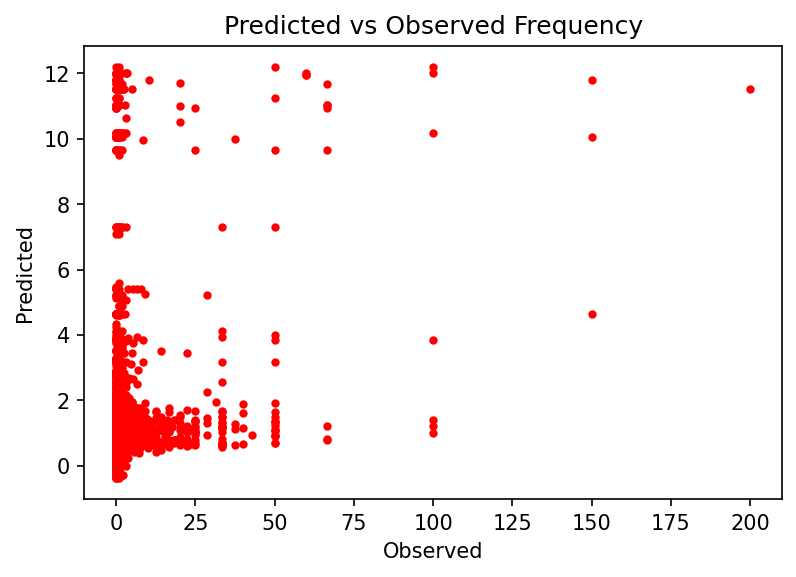

In [79]:
plt.plot(observed,y_predProb, 'ro', markersize = 3 )
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.title('Predicted vs Observed Frequency')
plt.show()


In [67]:
sResidual = observed - y_predProb

pResidual = sResidual/ ((y_predProb)**(0.5))

/var/folders/vp/yr6qb60x54q0pc8xg0dz3jg00000gn/T/ipykernel_13239/2590601839.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(observed,pResidual,'ro', color = 'blue', label='pResidual', markersize = 3)


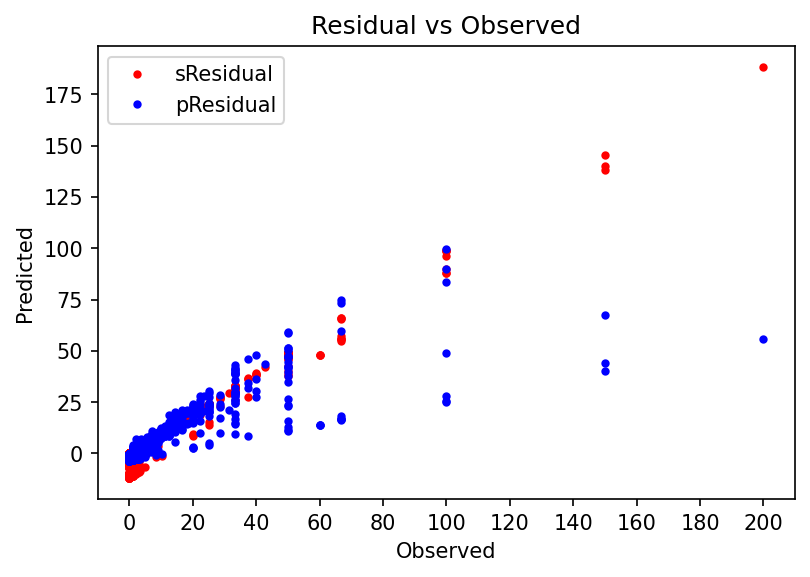

In [80]:

plt.plot(observed,sResidual, 'ro',label='sResidual', markersize = 3)
plt.plot(observed,pResidual,'ro', color = 'blue', label='pResidual', markersize = 3)
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.title('Residual vs Observed')
plt.xticks(np.arange(0, 201, 20))
plt.legend()
plt.show()